# Kaggle Dataset


---


## AI Assistant Usage in Student Life


---





Exploring how students at different academic levels use AI tools like ChatGPT for tasks such as coding, writing, studying, and brainstorming. Designed for learning, EDA, and ML experimentation.

This dataset simulates 10,000 sessions of students interacting with an AI assistant (like ChatGPT or similar tools) for various academic tasks. Each row represents a single session, capturing the student’s level, discipline, type of task, session length, AI effectiveness, satisfaction rating, and whether they reused the AI tool later.






In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/kaggle/input/ai-assistant-usage-in-student-life-synthetic/ai_assistant_usage_student_life.csv')
data.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SessionID           10000 non-null  object 
 1   StudentLevel        10000 non-null  object 
 2   Discipline          10000 non-null  object 
 3   SessionDate         10000 non-null  object 
 4   SessionLengthMin    10000 non-null  float64
 5   TotalPrompts        10000 non-null  int64  
 6   TaskType            10000 non-null  object 
 7   AI_AssistanceLevel  10000 non-null  int64  
 8   FinalOutcome        10000 non-null  object 
 9   UsedAgain           10000 non-null  bool   
 10  SatisfactionRating  10000 non-null  float64
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 791.1+ KB


In [4]:
print("Student Level: ",data['StudentLevel'].unique())
print("Student Discipline: ",data['Discipline'].unique())
print("Task Type: ",data['TaskType'].unique())
print("Final Outcome: ",data['FinalOutcome'].unique())
print("Used Again: ",data['UsedAgain'].unique())

Student Level:  ['Undergraduate' 'Graduate' 'High School']
Student Discipline:  ['Computer Science' 'Psychology' 'Business' 'Biology' 'Math' 'History'
 'Engineering']
Task Type:  ['Studying' 'Coding' 'Writing' 'Brainstorming' 'Homework Help' 'Research']
Final Outcome:  ['Assignment Completed' 'Idea Drafted' 'Confused' 'Gave Up']
Used Again:  [ True False]


### Task1: EDA-Visualize session behavior across levels, tasks, or disciplines

In [5]:
data.describe()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780
std,13.897302,4.648764,0.991805,1.143331
min,0.030000,1.000000,1.000000,1.000000
25%,9.630000,2.000000,3.000000,2.600000
50%,16.650000,4.000000,4.000000,3.500000
75%,26.670000,8.000000,4.000000,4.400000
max,110.810000,39.000000,5.000000,5.000000


## Visualize student level distribution

### Subtask:
Create a visualization to show the distribution of students across different academic levels.


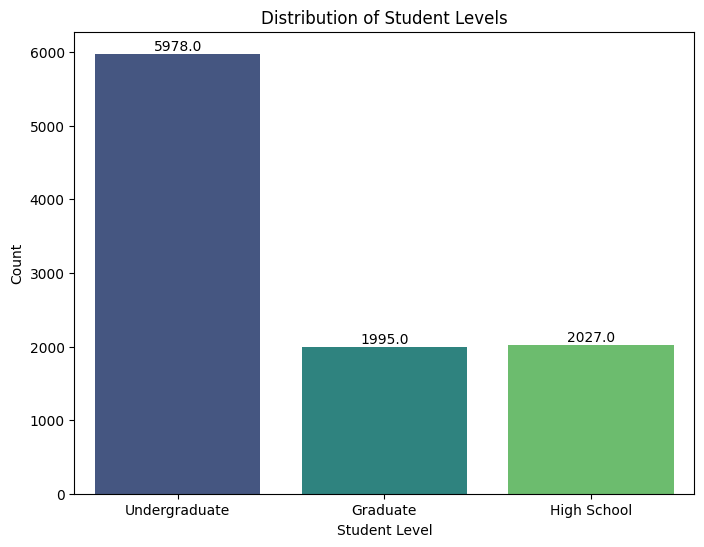

In [6]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='StudentLevel', palette='viridis')
plt.title('Distribution of Student Levels')
plt.xlabel('Student Level')
#displaying values of count
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(),
             f'{p.get_height()}', ha='center', va='bottom')
plt.ylabel('Count')
plt.show()

## Visualize task type distribution

### Subtask:
Create a visualization to show the distribution of different task types.


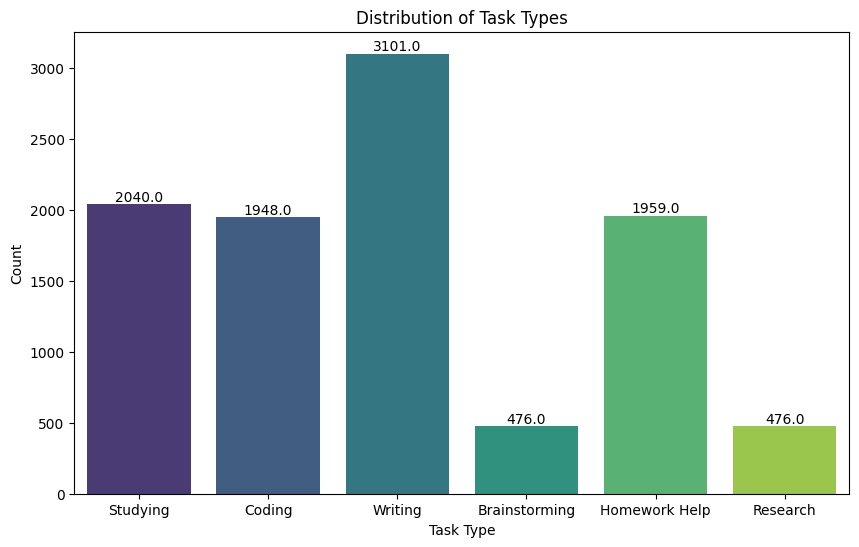

In [7]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='TaskType',palette='viridis')
plt.title('Distribution of Task Types')
plt.xlabel('Task Type')
#displaying values of count
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(),
             f'{p.get_height()}', ha='center', va='bottom')
plt.ylabel('Count')
plt.show()

## Visualize discipline distribution

### Subtask:
Create a visualization to show the distribution of different disciplines.


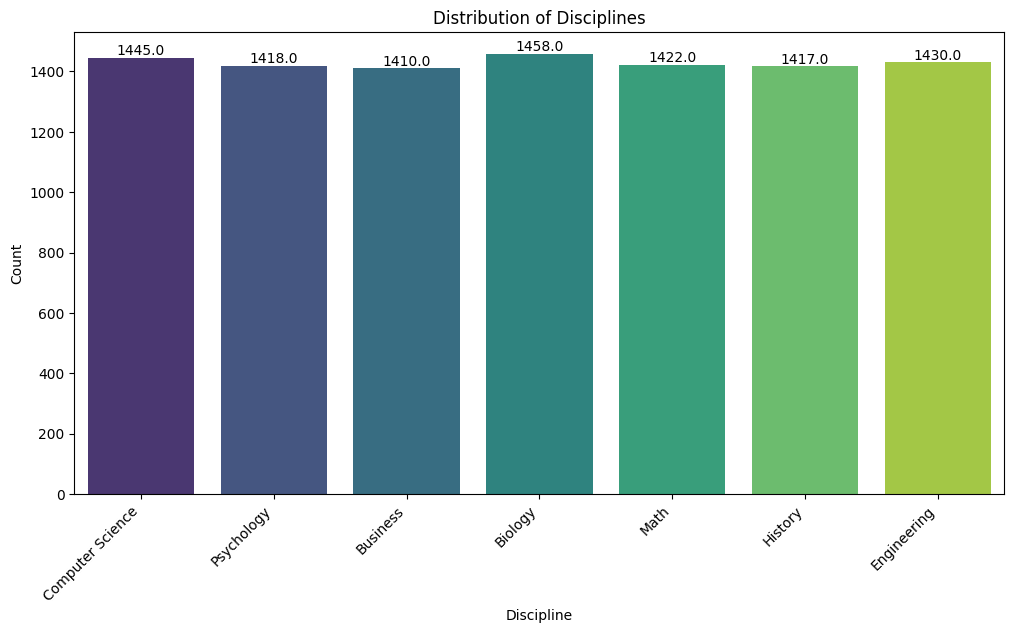

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Discipline',palette='viridis')
plt.title('Distribution of Disciplines')
plt.xlabel('Discipline')
##displaying values of count
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width()/2., p.get_height(),
             f'{p.get_height()}', ha='center', va='bottom')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

## Visualize session length by student level

### Subtask:
Create a visualization to compare session lengths across different student levels.


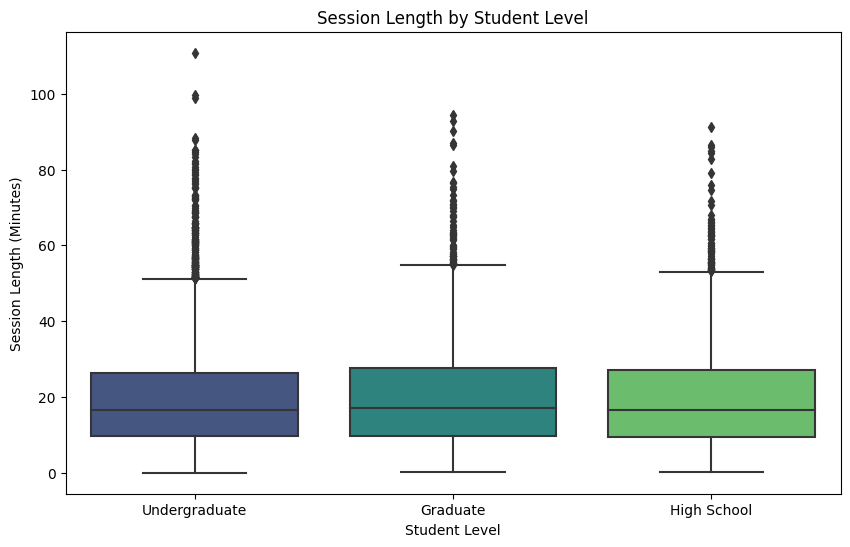

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='StudentLevel', y='SessionLengthMin',palette='viridis')
plt.title('Session Length by Student Level')
plt.xlabel('Student Level')
plt.ylabel('Session Length (Minutes)')
plt.show()

## Visualize ai assistance level by discipline

### Subtask:
Create a visualization to compare AI assistance levels across different disciplines.


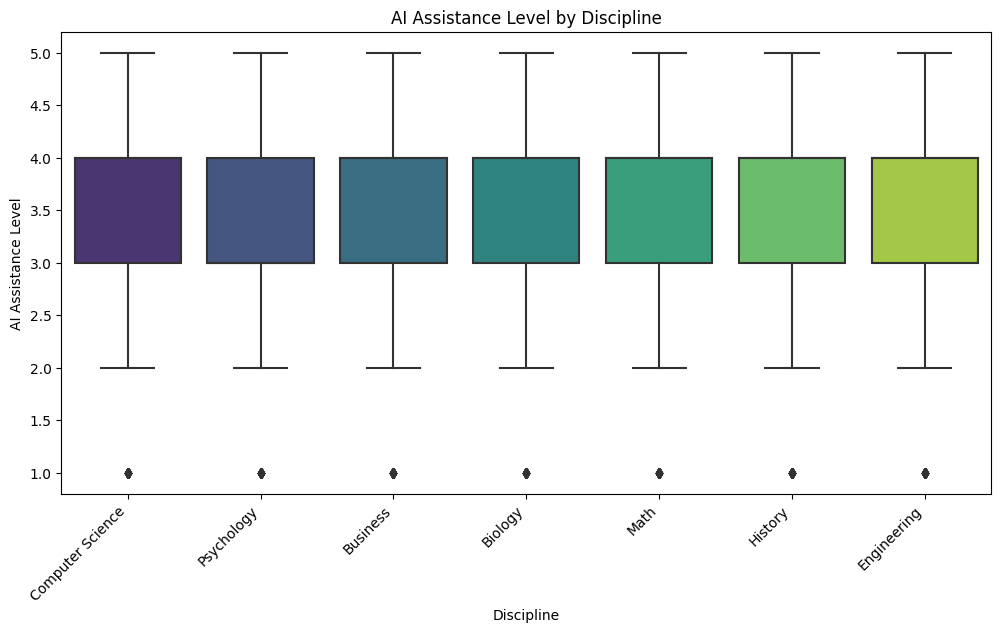

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='Discipline', y='AI_AssistanceLevel',palette="viridis")
plt.title('AI Assistance Level by Discipline')
plt.xlabel('Discipline')
plt.ylabel('AI Assistance Level')
plt.xticks(rotation=45, ha='right')
plt.show()

## Task2 :Classification-Predict likelihood of reuse (UsedAgain) or final outcome

In [11]:
X = data.drop(['UsedAgain', 'FinalOutcome','SessionID','SessionDate'], axis=1)
y = data['UsedAgain']
X.head()

,StudentLevel,Discipline,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,SatisfactionRating
0,Undergraduate,Computer Science,31.20,11,Studying,2,1.0
1,Undergraduate,Psychology,13.09,6,Studying,3,2.0
2,Undergraduate,Business,19.22,5,Coding,3,3.3
3,Undergraduate,Computer Science,3.70,1,Coding,3,3.5
4,Undergraduate,Psychology,28.12,9,Writing,3,2.9


In [12]:
X = pd.get_dummies(X)


In [13]:
#Splitting the data into Training and Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (8000, 20)
y_train shape: (8000,)
X_test shape: (2000, 20)
y_test shape: (2000,)


In [14]:
#Build model using Logistic Regression for Classification
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

In [15]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00       615
        True       0.69      1.00      0.82      1385

    accuracy                           0.69      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.48      0.69      0.57      2000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
log_accuracy = accuracy_score(y_test, y_pred)
log_precision = precision_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_f1 = f1_score(y_test, y_pred)
print(f'Accuracy: {log_accuracy:.2f}')
print(f'Precision: {log_precision:.2f}')
print(f'Recall: {log_recall:.2f}')
print(f'F1 Score: {log_f1:.2f}')

Accuracy: 0.69
Precision: 0.69
Recall: 1.00
F1 Score: 0.82


In [17]:
#Sample data
sample_data = pd.DataFrame({
    'StudentLevel': ['Graduate'],
    'Discipline': ['Computer Science'],
    'SessionLengthMin': '15',
    'TotalPrompts':'23',
    'TaskType':'Coding',
    'AI_AssistanceLevel':'4.5',
    'SatisfactionRating':'4.5',
})
sample_data

,StudentLevel,Discipline,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,SatisfactionRating
0,Graduate,Computer Science,15,23,Coding,4.5,4.5


In [18]:
sample_data_encoded = pd.get_dummies(sample_data)
# Align columns with the training data, adding missing columns with 0 and dropping extra ones
sample_data_aligned = sample_data_encoded.reindex(columns=X.columns, fill_value=0)
sample_data_aligned

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating,StudentLevel_Graduate,StudentLevel_High School,StudentLevel_Undergraduate,Discipline_Biology,Discipline_Business,Discipline_Computer Science,Discipline_Engineering,Discipline_History,Discipline_Math,Discipline_Psychology,TaskType_Brainstorming,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing
0,0,0,0,0,True,0,0,0,0,True,0,0,0,0,0,True,0,0,0,0


In [19]:
if log_model.predict(sample_data_aligned):
  print("The student is likely to use the AI assistant again.")
else:
  print("The student is unlikely to use the AI assistant .")

The student is likely to use the AI assistant again.


In [20]:
#Built model using decision tree
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)

In [21]:
#Classisfication report
from sklearn.metrics import classification_report
print(classification_report(y_test, dt_y_pred))

              precision    recall  f1-score   support

       False       0.32      0.34      0.33       615
        True       0.70      0.68      0.69      1385

    accuracy                           0.58      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.58      0.58      0.58      2000



In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_precision = precision_score(y_test, dt_y_pred)
dt_recall = recall_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)
print(f'Accuracy: {dt_accuracy:.2f}')
print(f'Precision: {dt_precision:.2f}')
print(f'Recall: {dt_recall:.2f}')
print(f'F1 Score: {dt_f1:.2f}')

Accuracy: 0.58
Precision: 0.70
Recall: 0.68
F1 Score: 0.69


In [23]:
#Built model using random forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

In [24]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_y_pred))

              precision    recall  f1-score   support

       False       0.29      0.10      0.15       615
        True       0.69      0.89      0.78      1385

    accuracy                           0.65      2000
   macro avg       0.49      0.49      0.46      2000
weighted avg       0.57      0.65      0.58      2000



In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_precision = precision_score(y_test, rf_y_pred)
rf_recall = recall_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred)
print(f'Accuracy: {rf_accuracy:.2f}')
print(f'Precision: {rf_precision:.2f}')
print(f'Recall: {rf_recall:.2f}')
print(f'F1 Score: {rf_f1:.2f}')


Accuracy: 0.65
Precision: 0.69
Recall: 0.89
F1 Score: 0.78


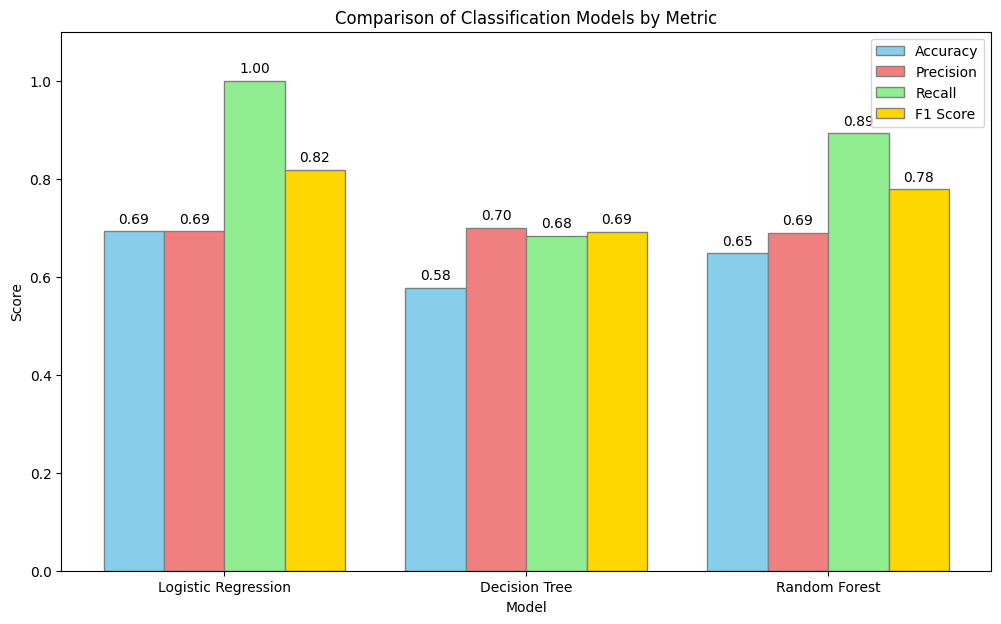

In [26]:
#Comparison barplot of three models Logistic, Desision Tree, Random Forest
import numpy as np
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy = [log_accuracy, dt_accuracy, rf_accuracy]
precision = [log_precision, dt_precision, rf_precision]
recall = [log_recall, dt_recall, rf_recall]
f1 = [log_f1, dt_f1, rf_f1]

plt.figure(figsize=(12, 7))

bar_width = 0.2
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

plt.bar(r1, accuracy, color='skyblue', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='lightcoral', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='lightgreen', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1, color='gold', width=bar_width, edgecolor='grey', label='F1 Score')

# Display scores on each bar
for i in range(len(models)):
    plt.text(r1[i], accuracy[i] + 0.01, f'{accuracy[i]:.2f}', ha='center', va='bottom')
    plt.text(r2[i], precision[i] + 0.01, f'{precision[i]:.2f}', ha='center', va='bottom')
    plt.text(r3[i], recall[i] + 0.01, f'{recall[i]:.2f}', ha='center', va='bottom')
    plt.text(r4[i], f1[i] + 0.01, f'{f1[i]:.2f}', ha='center', va='bottom')


plt.title('Comparison of Classification Models by Metric')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks([r + bar_width*1.5 for r in range(len(models))], models)
plt.ylim(0, 1.1) # Set y-axis limit from 0 to 1.1 to accommodate scores
plt.legend()
plt.show()

## Task3: Regression-Model satisfaction or session length based on context

In [27]:
X = data.drop(['SatisfactionRating', 'FinalOutcome','SessionID','SessionDate'], axis=1)
y = data['SatisfactionRating']
X.head()

,StudentLevel,Discipline,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,UsedAgain
0,Undergraduate,Computer Science,31.20,11,Studying,2,True
1,Undergraduate,Psychology,13.09,6,Studying,3,True
2,Undergraduate,Business,19.22,5,Coding,3,True
3,Undergraduate,Computer Science,3.70,1,Coding,3,True
4,Undergraduate,Psychology,28.12,9,Writing,3,True


In [28]:
X = pd.get_dummies(X)
X.head()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,UsedAgain,StudentLevel_Graduate,StudentLevel_High School,StudentLevel_Undergraduate,Discipline_Biology,Discipline_Business,Discipline_Computer Science,Discipline_Engineering,Discipline_History,Discipline_Math,Discipline_Psychology,TaskType_Brainstorming,TaskType_Coding,TaskType_Homework Help,TaskType_Research,TaskType_Studying,TaskType_Writing
0,31.20,11,2,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False
1,13.09,6,3,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False
2,19.22,5,3,True,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False
3,3.70,1,3,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False
4,28.12,9,3,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True


In [29]:
#Splitting of data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (8000, 20)
y_train shape: (8000,)
X_test shape: (2000, 20)
y_test shape: (2000,)


In [30]:
#Model building using Linear Regression
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

In [31]:
#Report of Linear Regression Model
from sklearn.metrics import mean_squared_error, r2_score
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)
print(f'Mean Squared Error: {lr_mse:.2f}')
print(f'R-squared: {lr_r2:.2f}')

Mean Squared Error: 0.51
R-squared: 0.61


In [32]:
sample_data1 = pd.DataFrame({
    'StudentLevel': ['Graduate'],
    'Discipline': ['Computer Science'],
    'SessionLengthMin': '45',
    'TotalPrompts':'35',
    'TaskType':'Coding',
    'AI_AssistanceLevel':'4',
    'UsedAgain':'Yes',
})
sample_data1

,StudentLevel,Discipline,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,UsedAgain
0,Graduate,Computer Science,45,35,Coding,4,Yes


In [33]:
# Convert 'UsedAgain' to boolean
sample_data1['UsedAgain'] = sample_data1['UsedAgain'].apply(lambda x: True if x == 'Yes' else False)

# One-hot encode the sample data
sample_data1_encoded = pd.get_dummies(sample_data1)

# Align columns with the training data, adding missing columns with 0 and dropping extra ones
sample_data1_aligned = sample_data1_encoded.reindex(columns=X.columns, fill_value=0)

# Predict using the linear regression model
print(f"Student Statisfaction Rate will be around: {lr_model.predict(sample_data1_aligned)[0]:.2f}")

Student Statisfaction Rate will be around: 0.35


In [34]:
#Build model using Decision Tree
from sklearn.tree import DecisionTreeRegressor
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)
dtr_y_pred = dtr_model.predict(X_test)

In [35]:
#Report of model
from sklearn.metrics import mean_squared_error, r2_score
dtr_mse = mean_squared_error(y_test, dtr_y_pred)
dtr_r2 = r2_score(y_test, dtr_y_pred)
print(f'Mean Squared Error: {dtr_mse:.2f}')
print(f'R-squared: {dtr_r2:.2f}')

Mean Squared Error: 1.06
R-squared: 0.18


In [36]:
#Build model using Random Forest
from sklearn.ensemble import RandomForestRegressor
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train, y_train)
rfr_y_pred = rfr_model.predict(X_test)

In [37]:
#Report of model
from sklearn.metrics import mean_squared_error, r2_score
rfr_mse = mean_squared_error(y_test, rfr_y_pred)
rfr_r2 = r2_score(y_test, rfr_y_pred)
print(f'Mean Squared Error: {rfr_mse:.2f}')
print(f'R-squared: {rfr_r2:.2f}')

Mean Squared Error: 0.57
R-squared: 0.57


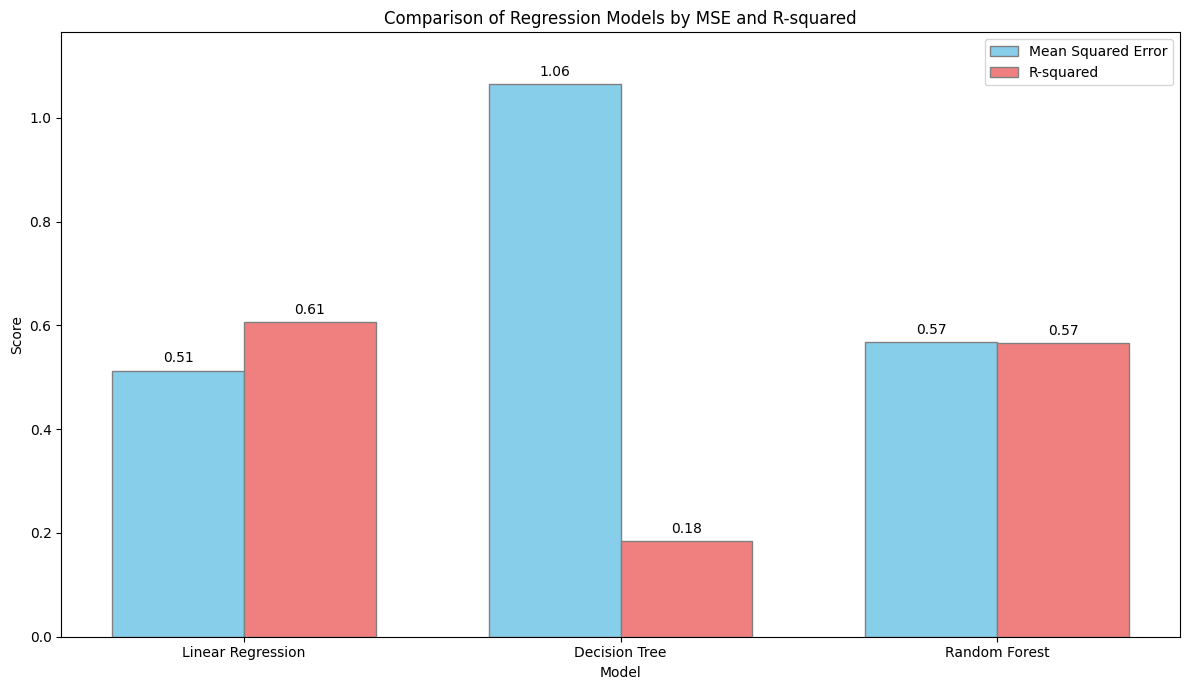

In [38]:
#Comparison barplot of three Regression models by Mean Squared Error and R-squared
import numpy as np
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Decision Tree', 'Random Forest']
mse_scores = [lr_mse, dtr_mse, rfr_mse]
r2_scores = [lr_r2, dtr_r2, rfr_r2]

plt.figure(figsize=(12, 7))

bar_width = 0.35
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Plot Mean Squared Error
plt.bar(r1, mse_scores, color='skyblue', width=bar_width, edgecolor='grey', label='Mean Squared Error')
# Plot R-squared
plt.bar(r2, r2_scores, color='lightcoral', width=bar_width, edgecolor='grey', label='R-squared')


# Display scores on each bar
for i in range(len(models)):
    plt.text(r1[i], mse_scores[i] + 0.01, f'{mse_scores[i]:.2f}', ha='center', va='bottom')
    plt.text(r2[i], r2_scores[i] + 0.01, f'{r2_scores[i]:.2f}', ha='center', va='bottom')

plt.title('Comparison of Regression Models by MSE and R-squared')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend()
plt.ylim(0, max(max(mse_scores), max(r2_scores)) + 0.1) # Adjust y-axis limit dynamically
plt.tight_layout()
plt.show()

## Task3: Clustering- Segment students by AI interaction behavior


## Select features

### Subtask:
Choose the relevant features from the dataset for clustering.


In [39]:
clustering_features = data[['SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel', 'SatisfactionRating', 'UsedAgain']]
clustering_features.head()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating,UsedAgain
0,31.20,11,2,1.0,True
1,13.09,6,3,2.0,True
2,19.22,5,3,3.3,True
3,3.70,1,3,3.5,True
4,28.12,9,3,2.9,True


## Preprocess data

### Subtask:
Handle categorical variables and scale numerical features for clustering.


In [40]:
clustering_features['UsedAgain'] = clustering_features['UsedAgain'].astype(int)
numerical_features = clustering_features.select_dtypes(include=['float64', 'int64'])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)
scaled_numerical_features_df = pd.DataFrame(scaled_numerical_features, columns=numerical_features.columns)
scaled_numerical_features_df.head()

/tmp/ipykernel_14/4161685513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clustering_features['UsedAgain'] = clustering_features['UsedAgain'].astype(int)


,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating,UsedAgain
0,0.817000,1.160044,-1.491799,-2.114786,0.644693
1,-0.486195,0.084435,-0.483486,-1.240105,0.644693
2,-0.045081,-0.130686,-0.483486,-0.103020,0.644693
3,-1.161900,-0.991173,-0.483486,0.071916,0.644693
4,0.595364,0.729800,-0.483486,-0.452892,0.644693


## Determine the optimal number of clusters

### Subtask:
Use methods like the elbow method or silhouette score to find the appropriate number of clusters.


In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

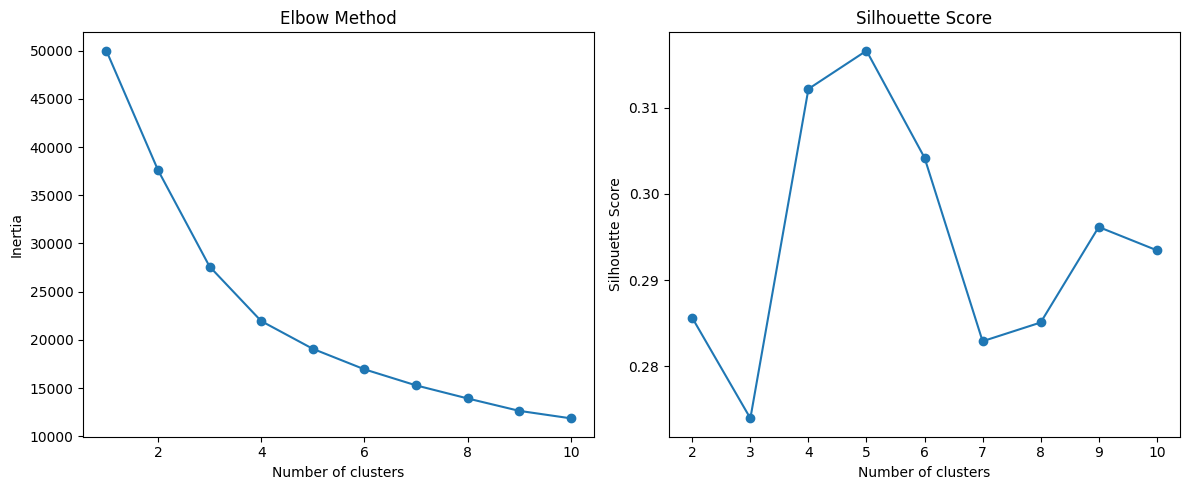

In [42]:
inertia = []
silhouette_scores = []
k_range_inertia = range(1, 11)
k_range_silhouette = range(2, 11)  # Silhouette score is not defined for k=1

for k in k_range_inertia:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_numerical_features_df)
    inertia.append(kmeans.inertia_)

for k in k_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_numerical_features_df)
    silhouette_scores.append(silhouette_score(scaled_numerical_features_df, kmeans.labels_))


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range_inertia, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range_silhouette, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

## Apply clustering algorithm

### Subtask:
Apply a clustering algorithm (e.g., K-Means) to the preprocessed data.


In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

k = 3 # Based on the elbow and silhouette plots from the previous step
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(scaled_numerical_features_df)
data['Cluster'] = kmeans.labels_
data.head()

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating,Cluster
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0,0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0,0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3,0
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5,0
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9,0


## Visualize clusters

### Subtask:
Visualize the clusters to gain insights into the segmentation.


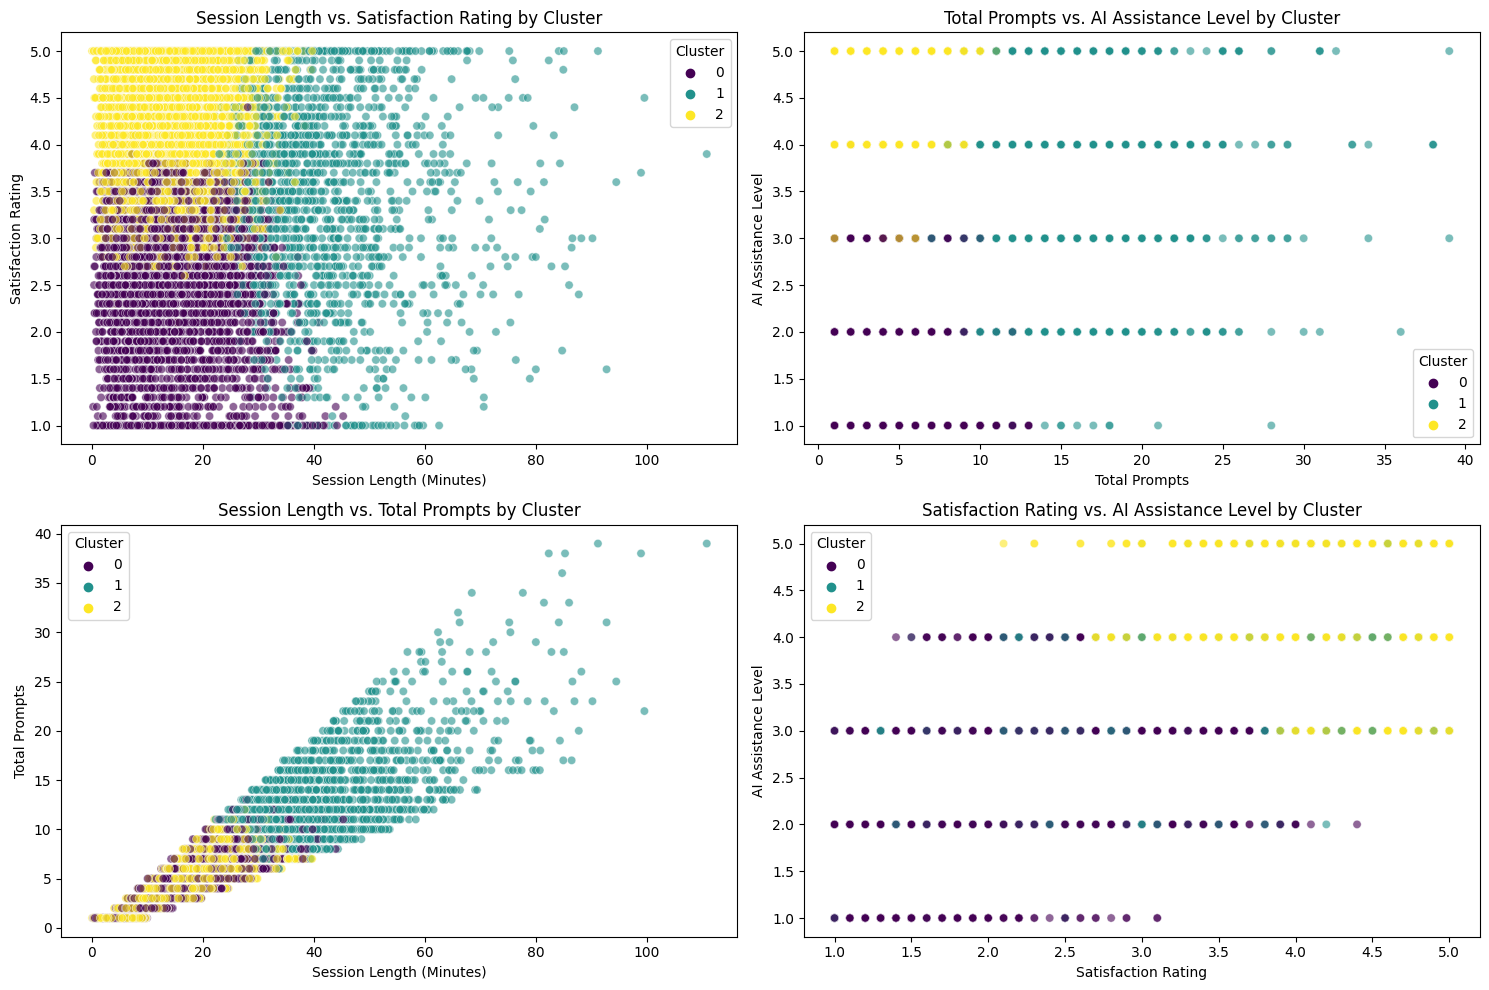

In [44]:
plt.figure(figsize=(15, 10))

# Scatter plot of SessionLengthMin vs. SatisfactionRating
plt.subplot(2, 2, 1)
sns.scatterplot(data=data, x='SessionLengthMin', y='SatisfactionRating', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Session Length vs. Satisfaction Rating by Cluster')
plt.xlabel('Session Length (Minutes)')
plt.ylabel('Satisfaction Rating')

# Scatter plot of TotalPrompts vs. AI_AssistanceLevel
plt.subplot(2, 2, 2)
sns.scatterplot(data=data, x='TotalPrompts', y='AI_AssistanceLevel', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Total Prompts vs. AI Assistance Level by Cluster')
plt.xlabel('Total Prompts')
plt.ylabel('AI Assistance Level')

# Scatter plot of SessionLengthMin vs. TotalPrompts
plt.subplot(2, 2, 3)
sns.scatterplot(data=data, x='SessionLengthMin', y='TotalPrompts', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Session Length vs. Total Prompts by Cluster')
plt.xlabel('Session Length (Minutes)')
plt.ylabel('Total Prompts')

# Scatter plot of SatisfactionRating vs. AI_AssistanceLevel
plt.subplot(2, 2, 4)
sns.scatterplot(data=data, x='SatisfactionRating', y='AI_AssistanceLevel', hue='Cluster', palette='viridis', alpha=0.6)
plt.title('Satisfaction Rating vs. AI Assistance Level by Cluster')
plt.xlabel('Satisfaction Rating')
plt.ylabel('AI Assistance Level')

plt.tight_layout()
plt.show()